In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set_style("dark")

***DOWNLOAD THE DATA***

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e22/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e22/test.csv")
origin = pd.read_csv("/kaggle/input/horse-survival-dataset/horse.csv")

total_train = pd.concat([train, origin], axis=0)
total_train = total_train.drop("id", axis=1)

target = total_train["outcome"]
total_train = total_train.drop("outcome", axis=1)
total_train = total_train.reset_index(drop=True)
test = test.drop("id", axis = 1)

***LOOKING FOR THE SUMMARY OF MISSING VALUES***

In [3]:
def missing_summary(df):
    sum = pd.DataFrame(df.dtypes, columns=["dtypes"])
    sum["missing"] =  df.isnull().sum()
    sum["missing%"] = df.isnull().sum() / len(df) * 100
    sum["count"] = df.count()
    sum = sum.sort_values(by=["missing"], ascending=False)
    sum = sum.query("missing > 0")
    return sum

In [4]:
missing_summary(total_train).style.background_gradient("YlGnBu")

,dtypes,missing,missing%,count
abdomen,object,331,21.577575,1203
rectal_exam_feces,object,292,19.035202,1242
nasogastric_reflux_ph,float64,246,16.036506,1288
abdomo_appearance,object,213,13.885267,1321
abdomo_protein,float64,198,12.907432,1336
nasogastric_tube,object,184,11.994785,1350
peripheral_pulse,object,129,8.409387,1405
nasogastric_reflux,object,127,8.279009,1407
pain,object,99,6.453716,1435
temp_of_extremities,object,95,6.192960,1439


In [5]:
missing_summary(test).style.background_gradient("YlGnBu")

,dtypes,missing,missing%,count
abdomen,object,154,18.689320,670
rectal_exam_feces,object,125,15.169903,699
nasogastric_tube,object,64,7.766990,760
peripheral_pulse,object,47,5.703883,777
temp_of_extremities,object,35,4.247573,789
abdomo_appearance,object,31,3.762136,793
pain,object,29,3.519417,795
abdominal_distention,object,22,2.669903,802
peristalsis,object,19,2.305825,805
nasogastric_reflux,object,14,1.699029,810


***TRYING TO FIND IF THERE ARE ANY DIFFERENT VALUES BETWEEN TRAIN AND TEST SETS***
> WE ARE GOING TO USE THOSE INFORMATIONS IN FEETURE ENGINEERING PART

In [6]:
# train - test
columns = list(total_train.columns)
for column in columns[1:-1]:
    difference = set(total_train[column].unique()) - set(test[column].unique())
    if difference:
        print(f"\033[91m difference in \033[96m{column}\033[00m \033[00m")
        print(difference)
        print()
    else:
        print(f"\033[91m There is no different values in \033[96m{column}\033[00m \033[00m")

 There is no different values in age 
 difference in hospital_number 
{528904, 535054, 534579, 527927, 527929, 527933, 528964, 534597, 528977, 527957, 534624, 534130, 529528, 535163, 5278331, 530561, 530051, 534157, 532110, 528031, 527526, 530101, 534719, 535240, 5262541, 528590, 5262543, 5279442, 533723, 529628, 533738, 530670, 528113, 533750, 528630, 528638, 528134, 535314, 529685, 528668, 5305629, 533793, 526639, 534324, 5288249, 535364, 530251, 518476, 535381, 535392, 529766, 534886, 5287279, 532349, 533886, 530301, 533887, 5292929, 534403, 527758, 530319, 529812, 530334, 5290402, 528804, 528298, 530354, 523190, 5292489, 534478, 533968, 521681, 526802, 534491, 529373, 533983, 528872, 532985, 530431}

 difference in rectal_temp 
{35.4, 36.7, 36.2, 36.8, 39.8, 39.7, 39.9, 40.0, nan, 36.9}

 difference in pulse 
{38.0, 49.0, 30.0, nan}

 difference in respiratory_rate 
{nan, 8.0, 72.0, 13.0, 52.0, 25.0}

 There is no different values in temp_of_extremities 
 There is no different valu

In [7]:
# test - train
columns = list(total_train.columns)
for column in columns[1:-1]:
    difference = set(test[column].unique()) - set(total_train[column].unique())
    if difference:
        print(f"\033[91m difference in \033[96m{column}\033[00m \033[00m")
        print(difference)
        print()
    else:
        print(f"\033[91m There is no different values in \033[96m{column}\033[00m \033[00m")

 There is no different values in age 
 difference in hospital_number 
{528338}

 There is no different values in rectal_temp 
 There is no different values in pulse 
 difference in respiratory_rate 
{64.0, 75.0, 54.0}

 There is no different values in temp_of_extremities 
 There is no different values in peripheral_pulse 
 There is no different values in mucous_membrane 
 There is no different values in capillary_refill_time 
 difference in pain 
{'moderate'}

 There is no different values in peristalsis 
 There is no different values in abdominal_distention 
 There is no different values in nasogastric_tube 
 There is no different values in nasogastric_reflux 
 difference in nasogastric_reflux_ph 
{2.5, 3.7, 4.8, 7.4}

 There is no different values in rectal_exam_feces 
 There is no different values in abdomen 
 difference in packed_cell_volume 
{31.2}

 difference in total_protein 
{10.1}

 There is no different values in abdomo_appearance 
 difference in abdomo_protein 
{1.2, 2.31, 

In [8]:
numerical_columns = total_train.select_dtypes(include=np.number).columns
categorical_columns = total_train.select_dtypes(include="object").columns

***MAKING SOME PLOTS TO UNDERSTAND THE DATA PROPERLY***

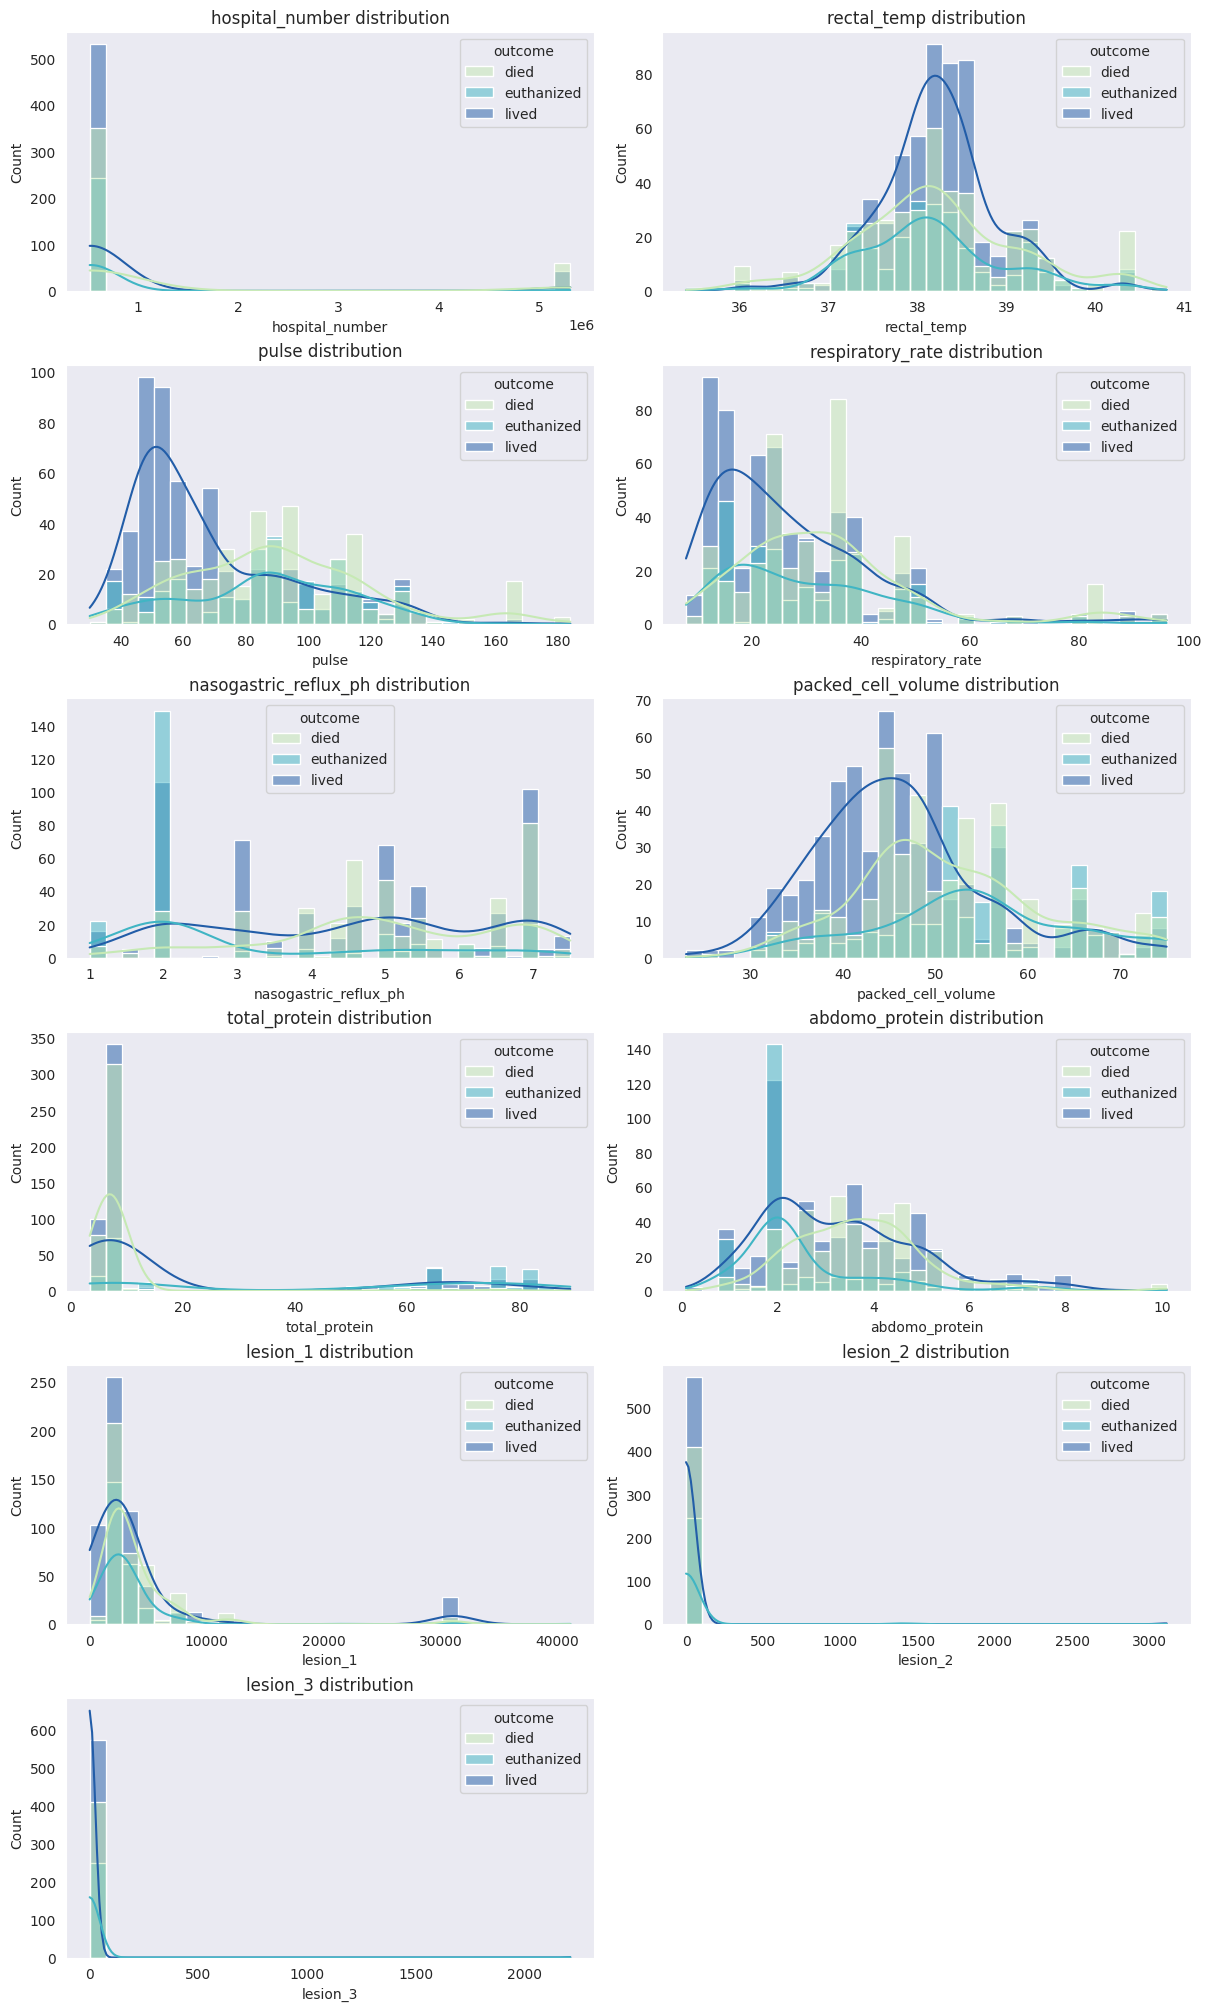

In [9]:
def histplot(df, columns, hue):
    plt.figure(figsize=(12,20), layout="constrained")
    for idx, column in enumerate(columns):
        plt.subplot(len(columns) // 2 + len(columns) % 2, 2, idx+1)
        sns.histplot(x=column, hue=hue, data=df, bins=30, kde=True, palette="YlGnBu")
        plt.title(f"{column} distribution")
        

histplot(pd.concat([train, test], axis=0), numerical_columns, 'outcome')

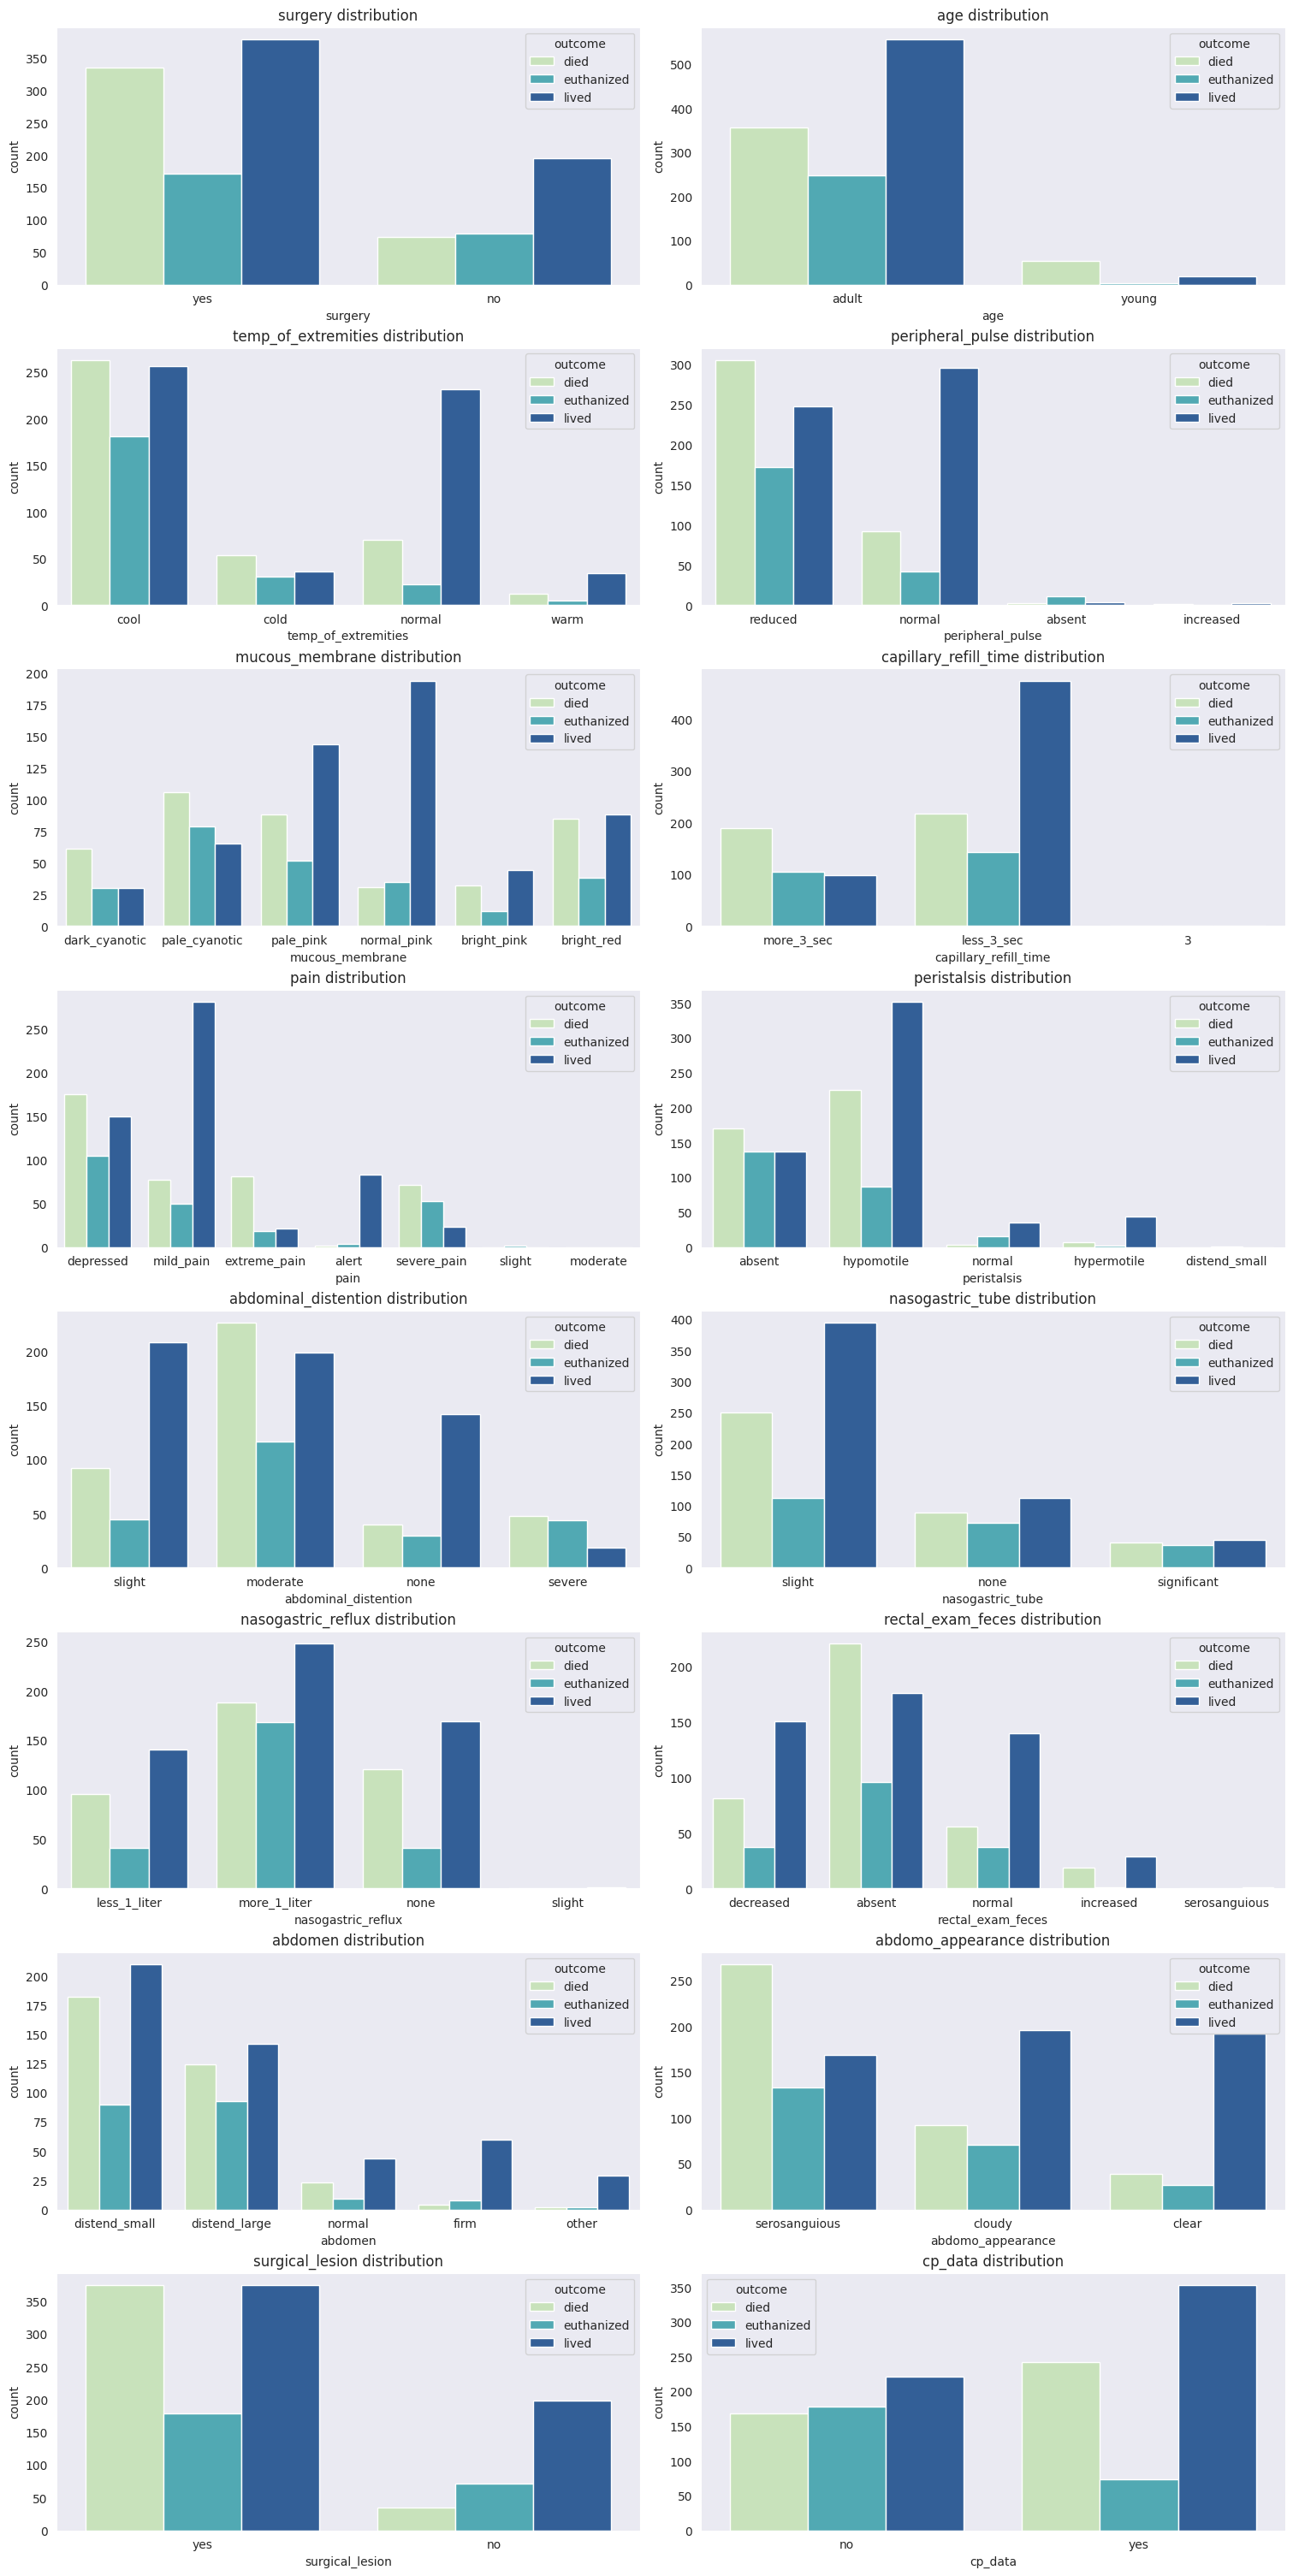

In [10]:
def countplot(df, columns, hue):
    plt.figure(figsize=(15,30), layout="constrained")
    for idx, column in enumerate(columns):
        plt.subplot(len(columns) // 2 + len(columns) % 2, 2, idx+1)
        sns.countplot(x=column, hue=hue, data=df, palette="YlGnBu")
        plt.title(f"{column} distribution") 
       
        
countplot(pd.concat([train, test], axis=0), categorical_columns, 'outcome')    

<Axes: >

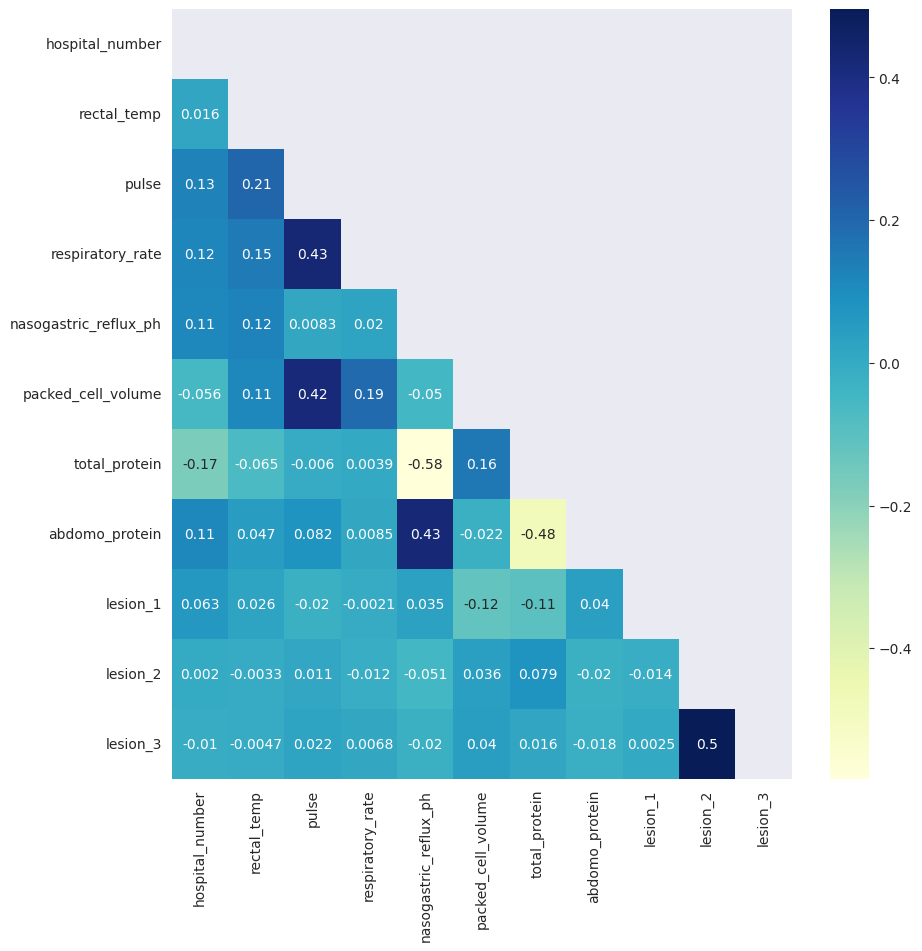

In [11]:
plt.figure(figsize=(10,10))
corr = pd.concat([train, test], axis=0)[numerical_columns].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, mask=mask, cmap="YlGnBu")

1. **lesion 2 and 3 can be dropped but I will try with and without them**
2. **hospital number can be dropped but I will with and without it**

In [12]:
total_train = total_train.drop(["hospital_number"], axis=1)
test = test.drop(["hospital_number"], axis=1)


In [13]:
numeric = total_train.select_dtypes(include=np.number).columns
cat = total_train.select_dtypes(include="object").columns

***FILLING MISSING VALUES***

In [14]:
target = target.replace({'lived': 2, 'euthanized': 1, 'died': 0})
for column in cat:
    total_train[column] = total_train[column].fillna(total_train[column].mode()[0])
    test[column] = test[column].fillna(test[column].mode()[0])

for column in numeric:
    total_train[column] = total_train[column].fillna(total_train[column].mean())
    test[column] = test[column].fillna(test[column].mean())

    
for column in cat:
    le = LabelEncoder()
    total_train[column] = le.fit_transform(total_train[column])
    test[column] = le.fit_transform(test[column])

***PREDICTING***

In [15]:
x_train = total_train.copy()
y_train = target.copy()
x_test = test.copy()

In [16]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
prediction = model.fit(x_train, y_train).predict(x_test)
prediction
# making the submission file ready
submission = pd.read_csv("/kaggle/input/playground-series-s3e22/sample_submission.csv")
submission.outcome = prediction
submission["outcome"].replace(
    {2: 'lived', 1: 'euthanized', 0: 'died'}, inplace=True)
submission.to_csv('011_submission.csv', index=False)

Learning rate set to 0.080872
0:	learn: 1.0604587	total: 56.1ms	remaining: 56.1s
1:	learn: 1.0286300	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9953268	total: 61ms	remaining: 20.3s
3:	learn: 0.9689161	total: 63.5ms	remaining: 15.8s
4:	learn: 0.9442272	total: 65.8ms	remaining: 13.1s
5:	learn: 0.9238045	total: 68.1ms	remaining: 11.3s
6:	learn: 0.9026968	total: 70.5ms	remaining: 10s
7:	learn: 0.8820834	total: 72.8ms	remaining: 9.03s
8:	learn: 0.8649730	total: 75.2ms	remaining: 8.28s
9:	learn: 0.8468511	total: 77.5ms	remaining: 7.68s
10:	learn: 0.8338813	total: 79.8ms	remaining: 7.17s
11:	learn: 0.8214661	total: 82.3ms	remaining: 6.77s
12:	learn: 0.8082412	total: 84.5ms	remaining: 6.41s
13:	learn: 0.7971847	total: 86.8ms	remaining: 6.12s
14:	learn: 0.7876397	total: 89.1ms	remaining: 5.85s
15:	learn: 0.7786329	total: 91.5ms	remaining: 5.63s
16:	learn: 0.7685996	total: 93.7ms	remaining: 5.42s
17:	learn: 0.7594565	total: 96.2ms	remaining: 5.25s
18:	learn: 0.7515330	total: 98.5ms	remaining: 5.